# Mango Markets Fiasco Part 1

### A brief report on attack (it requires understanding of the protocol, perps, oracles and the strategy used by the attacker)

This was not at all something that can be considered a hack.  Avi Eisenberg, the trader behind the liquidation, gives an extensive interview dated October 28, 2022, where he describes his trading strategy and attempt to remit users of Mango Markets.

The analyses in this project will have no effect on other "real" attacks like the bridge security attack on Wormhole in February 2022.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('mango-markets_2018-01-20_2023-01-19.csv')
x['Date'] = pd.to_datetime(x['Date'])
x = x.set_index('Date')
x = x.sort_index()


### What is (was) Mango Markets?

From the docs:

Mango Markets provides a single venue to lend, borrow, swap, and leverage-trade crypto assets through a powerful risk engine.

    * Earn interest on deposits
    * Cross-Margin / Cross-Collateralised
    * Decentralised

Mango Markets is built on the Solana blockchain and utilises Serum DEX for spot margin trading while perpetual futures are traded on Mango Markets' own order book. Mango Markets is governed by MNGO token holders via the Mango DAO.

Avraham Eisenberg caused every one of those bulletpoints to collapse.  There is still one massive holder with ~20x the amount of MNGO as the next biggest wallet.  It is unclear if this is Eisenberg.


### What are perps?

"Perpetuals allow initial leverage of up to 10x, and maintenance leverage of 20x. If the value of your position (or collateral) falls and your leverage exceeds 20x, your account will be eligible for liquidation."  In essence, this protects against accounts borrowing more than their value ...in MNGO... but it places no upper bound on the overall drawdowns of the market.

Because there are tiered scale benefits on the taker fee scheme, there is a fixed low fee for the maker rate, and borrowing and lending are free, the entire system is vulnerable to the attack we saw.  In essence, ponzishorter.eth Eisenberg was completely valid in his statements about trading strategy.

By making a big splash with these perpetual futures, one can borrow on unrealized gains.  Eisenberg held a couple of accounts with around $5M each and he drove up the price by purchasing with these accounts and borrowing on the margins.  He lifted all of the liquidity from every reserve currency from the market with these loans, and then stopped his market manipulation.

At this point, he offered to remit value to all of the users in what he considered a sort of forced bug bounty.


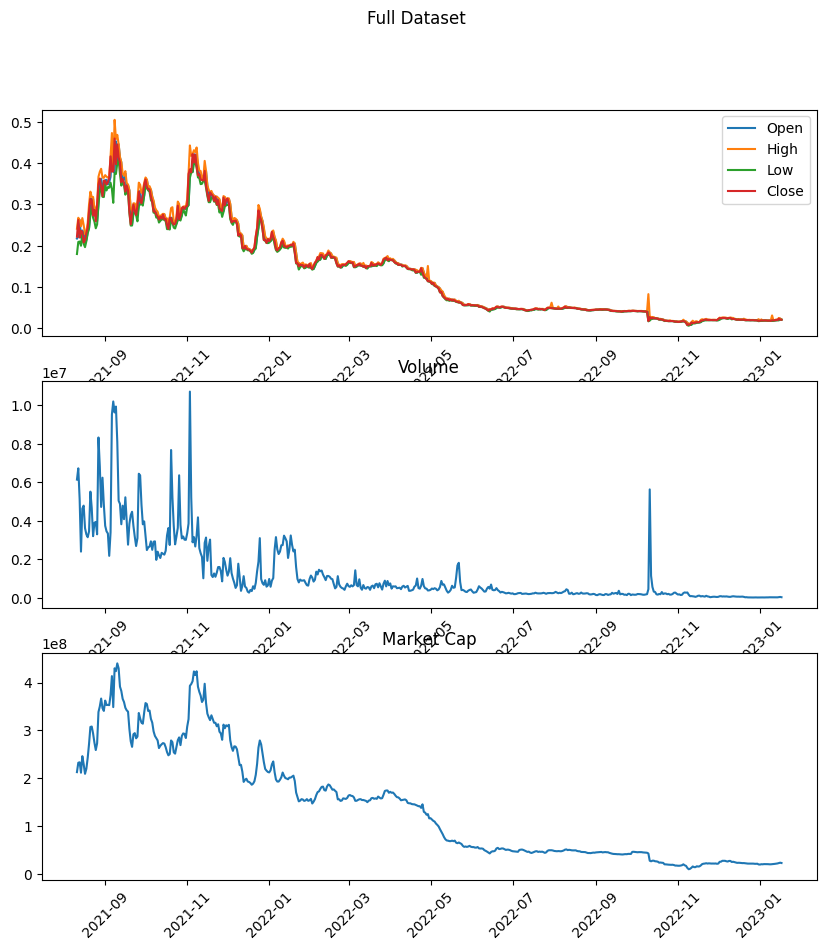

In [26]:
def plot_price_info(df, title):
    # Graph 3 plots in one figure
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))

    # Plot open, high, low, close
    ax[0].plot(df['Open'])
    ax[0].plot(df['High'])
    ax[0].plot(df['Low'])
    ax[0].plot(df['Close'])

    # Plot volume
    ax[1].plot(df['Volume'])
    ax[1].set_title('Volume')

    # Plot market cap
    ax[2].plot(df['Market Cap'])
    ax[2].set_title('Market Cap')# Plot price info for day 480 - 495

    # Plot legend
    ax[0].legend(['Open', 'High', 'Low', 'Close'])

    # Plot title
    fig.suptitle(title)

    # Rotate x-axis labels
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)

    plt.show()

plot_price_info(x, "Full Dataset")

The mountainous region on the left is what normal trading looks like.  The ups and downs are relevant to the disparities among the different color lines.  The spike on the right is the Eisenberg exploit.

We can look at this same information at a time frame closer to the event.


#### How did Avraham Eisenberg correctly assess Mango Markets as an economic target?

He outlines his approach a little bit when asked whether or not his actions fit with the intent of the developers.  He states that their intent can never be perfectly clear, and figuring that out is not just about going through the documentation.  You must also go through the source code to see if the tool lines up with the way it is supposed to function.

The acount that accepted the value that liquidated the platform was associated with Eisenberg's discord handle ponzishorter.eth, which, apart from being hilarious, is a big clue indicating what he calls a beneficial trading strategy.

#### Answering the question:

He probably picked it because trading volume across the platform had sunk to a base level for a long time, indicating scammable algo traders.  There were still many holdout types waiting for the price to explode back to previous levels.  And, his timing might have been related to the security audit released September 02.

He examined the docs and the source code to ensure that there were combined borrowing and lending operations via "perps".

His team did not implement any exploits on the protocol, they did not coerce anybody to act on their behalf, and they did not engage in any form of cybersecurity gotcha.  They used the platform exactly as directed.

In [ ]:
# Plot price info for October 5 to 15, 2022
plot_price_info(x['2022-10-05':'2022-10-15'], "October 5 to 15, 2022")

On September 9, he drove up the price, getting benefits in maker fees for being large scale, and the exponential increase of his trades on loans can be seen inverted in the market cap!

Then on September 10, the price naturally levels out when all the liquidity has been taken out on loan and removed from the system.



### 02 September 2022 Security Audit

The Neodyme audit team outlines their methodology.  The link to the entire document can be found in README.md.

Ruling out common classes of Solana contract vulnerabilities, such as:

* Missing ownership checks,
* Missing signer checks,
* Signed invocation of unverified programs,
* Solana account confusions,
* Re-initiation with cross-instance confusion,
* Missing freeze authority checks,
* Insufficient SPL token account verification,
* Missing rent exemption assertion,
* Casting truncation,
* Arithmetic over- or underflows,
* Numerical precision errors.

Other checks:

* Checking for unsafe design that might lead to common vulnerabilities being introduced in the
future,
* Checking for any other, as-of-yet unknown classes of vulnerabilities arising from the structure of
the Solana blockchain,
* Ensuring that the contract logic correctly implements the project specifications,
* Examining the code in detail for contract-specific low-level vulnerabilities,
* Ruling out denial-of-service attacks,
* Ruling out economic attacks,
* Checking for instructions that allow front-running or sandwiching attacks,
* Checking for rug-pull mechanisms or hidden backdoors,
* Checking for replay protection.

The findindings were all resolved or acknowledged:

* Orderbook sides were not sufficiently verified
* Perp value calculation can overflow
* Missing vault check in resolve_token_bankruptcy
* Deposit does not trigger interest update
* RootBankCache timeout inconsistency

None of the things listed in this audit report have anything to do with market risk!  These are risks to infrastructure and perhaps relevant to credit risk.  The exploit we have seen was of a paurely financial nature, and it did not take advantage of any technical issue with the system.